<a href="https://colab.research.google.com/github/JUANES31081/Perritos/blob/main/Copia_de_Clasificacion_perritos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Creando carpetas para las categorias
!mkdir pug
!mkdir beagle
!mkdir otros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/ZIPS/BEAGLE.zip' '/content/beagle'
!cp '/content/drive/MyDrive/ZIPS/PUG.zip' '/content/pug'
!cp '/content/drive/MyDrive/ZIPS/OTROS.zip' '/content/otros'

In [ ]:
#descomprimiendo en ambas carpetas

%cd beagle
!unzip BEAGLE.zip

%cd ..

%cd pug
!unzip PUG.zip

%cd ..

%cd otros
!unzip OTROS.zip

%cd ..


/content/beagle
Archive:  BEAGLE.zip
  inflating: beagle_1.jpg            
  inflating: beagle_10.jpg           
  inflating: beagle_100.jpg          
  inflating: beagle_101.jpg          
  inflating: beagle_102.jpg          
  inflating: beagle_103.jpg          
  inflating: beagle_104.jpg          
  inflating: beagle_105.jpg          
  inflating: beagle_107.jpg          
  inflating: beagle_108.jpg          
  inflating: beagle_109.jpg          
  inflating: beagle_110.jpg          
  inflating: beagle_111.jpg          
  inflating: beagle_112.jpg          
  inflating: beagle_113.jpg          
  inflating: beagle_114.jpg          
  inflating: beagle_115.jpg          
  inflating: beagle_116.jpg          
  inflating: beagle_117.jpg          
  inflating: beagle_118.jpg          
  inflating: beagle_119.jpg          
  inflating: beagle_12.jpg           
  inflating: beagle_120.jpg          
  inflating: beagle_121.jpg          
  inflating: beagle_122.jpg          
  inflating: 

In [ ]:
#eliminar la basura (ZIP)

!rm -rf  /content/pug/PUG.zip
!rm -rf /content/beagle/BEAGLE.zip
!rm -rf /content/otros/OTROS.zip

In [ ]:
#cuantas imagenes tiene cada carpeta

!ls /content/beagle | wc -l #395
!ls /content/pug | wc -l #400
!ls /content/otros/OTROS | wc -l #400

395
400
498


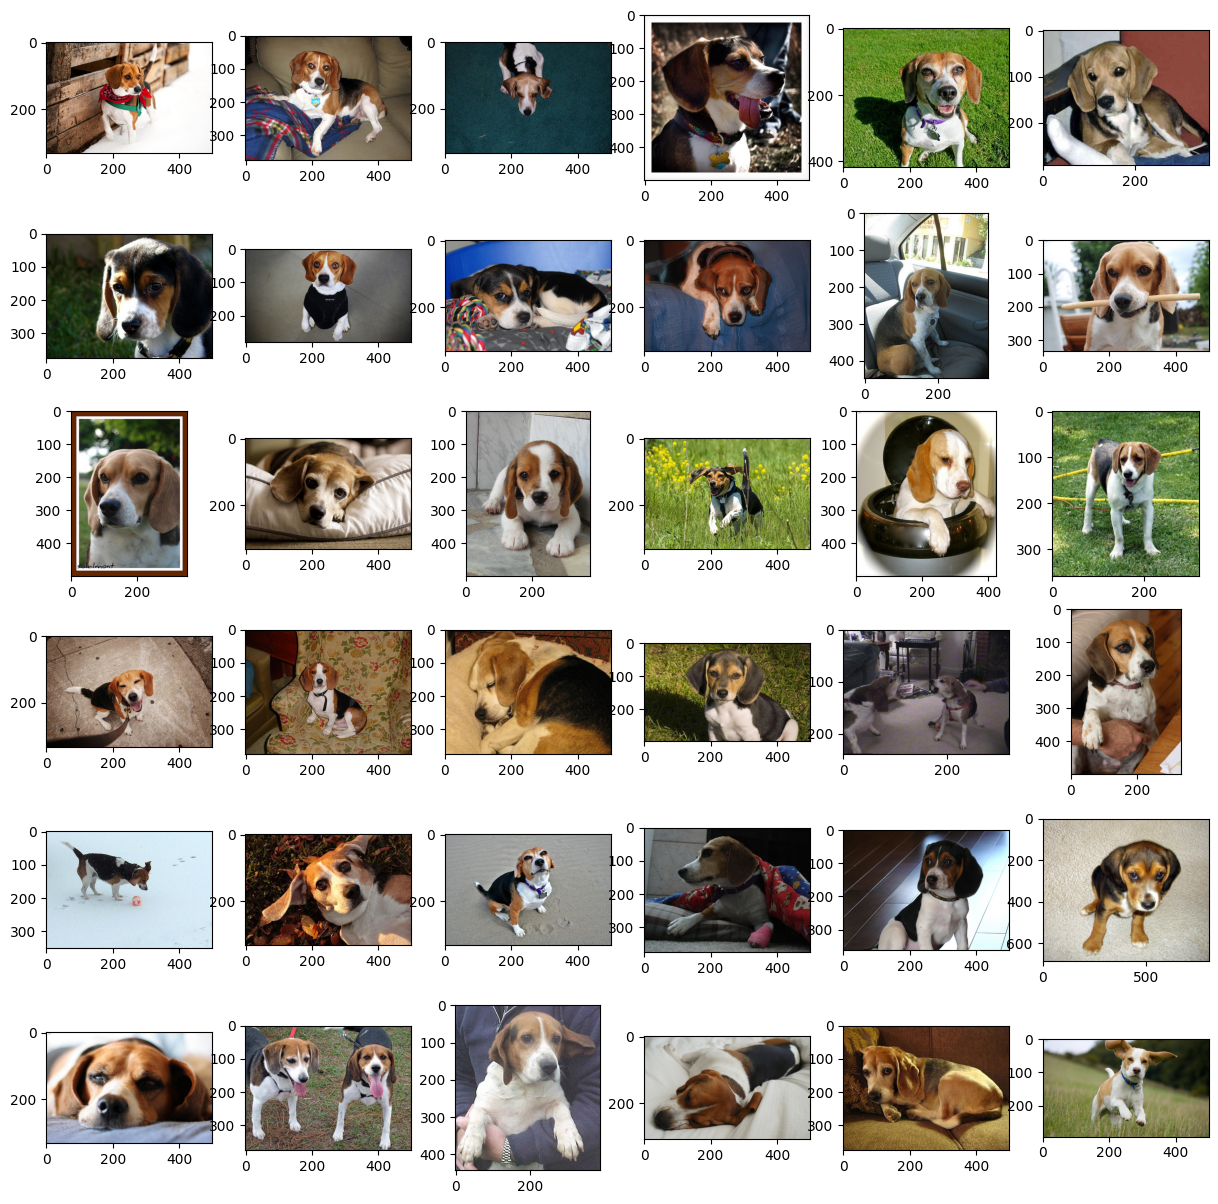

In [ ]:
#ver ejemplos de las imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/beagle'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:36]):
  plt.subplot(6,6,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

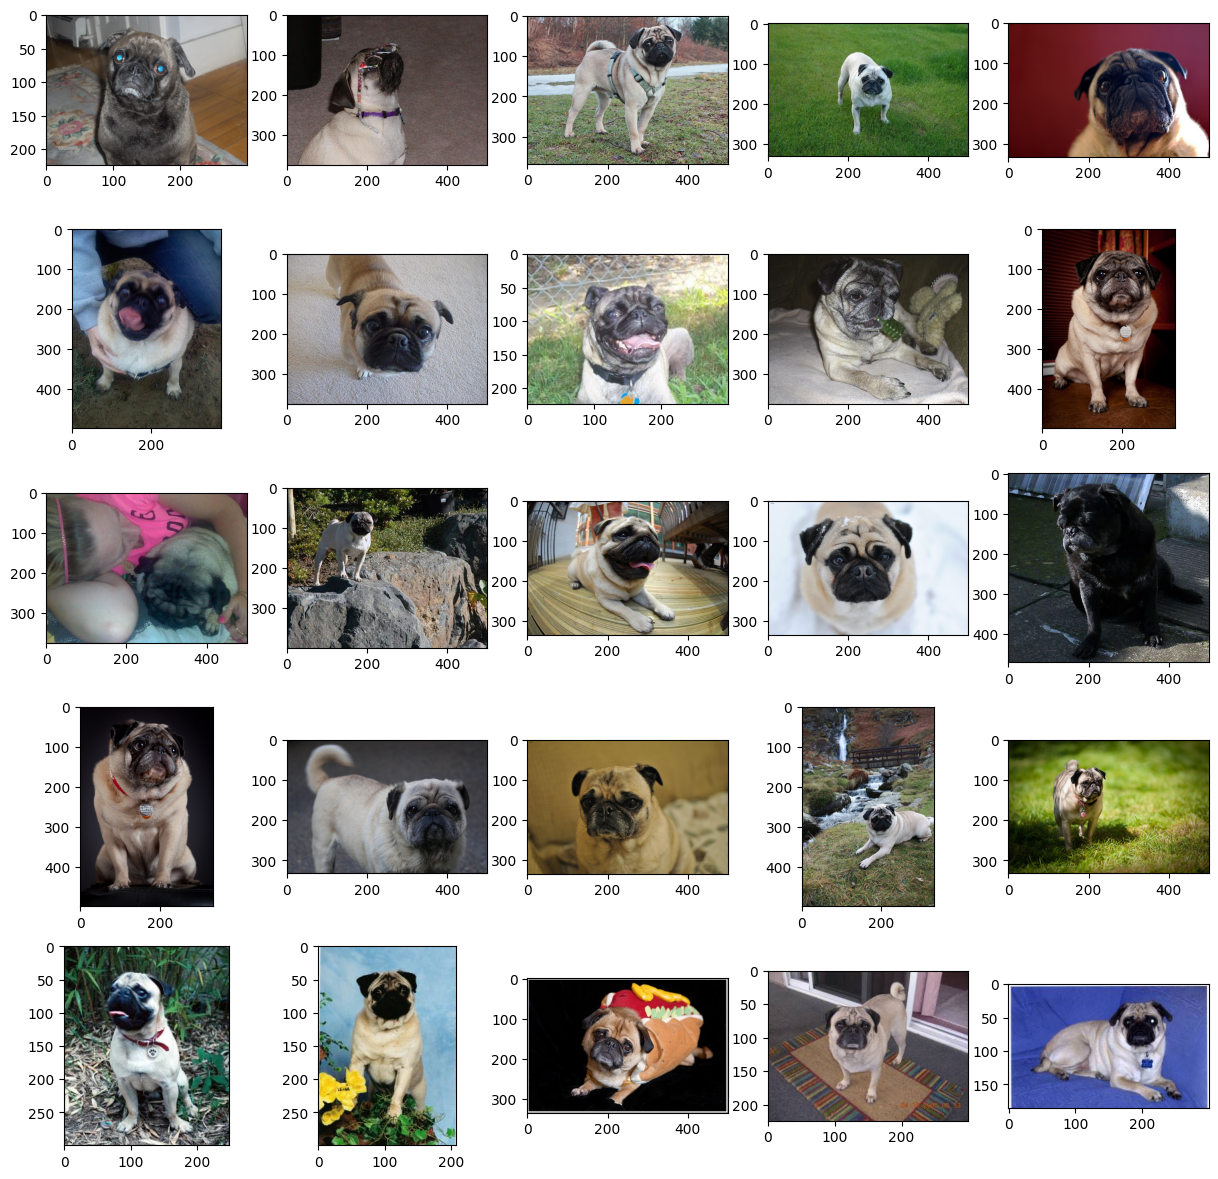

In [ ]:
#ver ejemplos de las imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/pug'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/pug
!mkdir dataset/beagle
!mkdir dataset/otros

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 395 (el num. menor de imagenes que se tiene)

import shutil
carpeta_fuente = '/content/beagle'
carpeta_destino = '/content/dataset/beagle'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 395:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 395 (el num. menor de imagenes que se tiene)

import shutil
carpeta_fuente = '/content/pug'
carpeta_destino = '/content/dataset/pug'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 395:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil
carpeta_fuente = '/content/otros/OTROS'
carpeta_destino = '/content/dataset/otros'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 395:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/pug/ | wc -l
!ls /content/dataset/beagle | wc -l
!ls /content/dataset/otros | wc -l

395
395
395


Found 891 images belonging to 3 classes.
Found 294 images belonging to 3 classes.


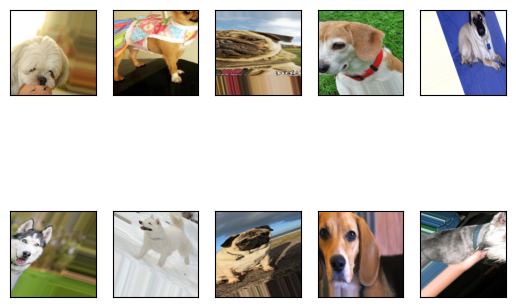

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 31,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.25 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=256, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=256, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
#importe de mobilenet v2
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
#Creando el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Resumen del modelo
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 256)      

In [ ]:
#Compilar como siempre
learning_rate = 0.001  # aun no se pero menos de 0,1 no es tyan rentable como parece
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 400

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=512, #entre 700 y 1000 puede estar el resultado o un poco menos talvez
    validation_data=data_gen_pruebas
)

Epoch 1/400
4/4 [==============================] - 52s 10s/step - loss: 4.1866 - accuracy: 0.3502 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 2/400
4/4 [==============================] - 22s 7s/step - loss: 1.1082 - accuracy: 0.3300 - val_loss: 1.0985 - val_accuracy: 0.3503
Epoch 3/400
4/4 [==============================] - 19s 5s/step - loss: 1.0977 - accuracy: 0.3423 - val_loss: 1.0982 - val_accuracy: 0.3367
Epoch 4/400
4/4 [==============================] - 18s 5s/step - loss: 1.0979 - accuracy: 0.3513 - val_loss: 1.0959 - val_accuracy: 0.3776
Epoch 5/400
4/4 [==============================] - 19s 6s/step - loss: 1.0946 - accuracy: 0.3591 - val_loss: 1.0928 - val_accuracy: 0.3537
Epoch 6/400
4/4 [==============================] - 20s 6s/step - loss: 1.0987 - accuracy: 0.3434 - val_loss: 1.0948 - val_accuracy: 0.3367
Epoch 7/400
4/4 [==============================] - 22s 6s/step - loss: 1.0958 - accuracy: 0.3524 - val_loss: 1.0923 - val_accuracy: 0.3946
Epoch 8/400
4/4 [=========

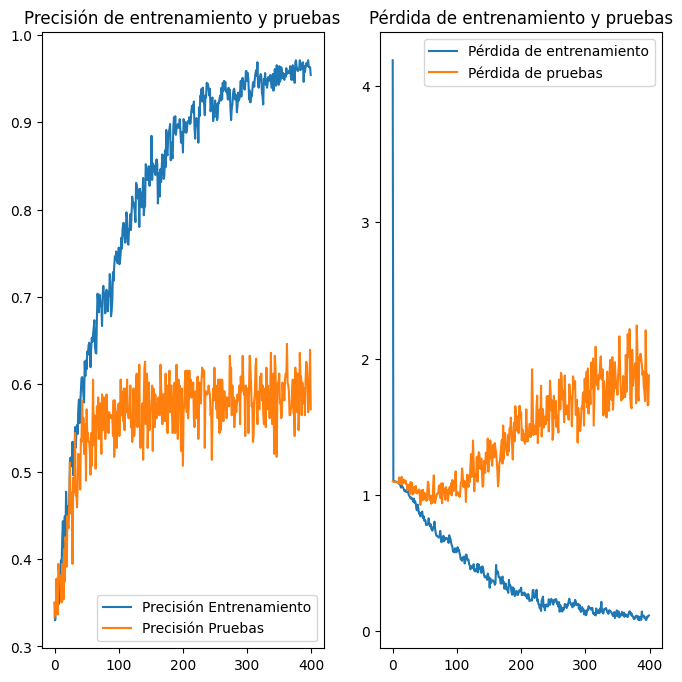

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(400)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizarURL(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

def categorizarIMG(img):
  img = Image.open(img)
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
def categorizar1_PURL(url):
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content))
    img = np.array(img).astype(float) / 255

    img = cv2.resize(img, (224, 224))
    probabilidades = modelo.predict(img.reshape(-1, 224, 224, 3))[0]
    return probabilidades

def categorizar1_PIMG(url):
    img = Image.open(img)
    img = np.array(img).astype(float) / 255

    img = cv2.resize(img, (224, 224))
    probabilidades = modelo.predict(img.reshape(-1, 224, 224, 3))[0]
    return probabilidades

In [ ]:
#0 = beagle, 1 = pug
#prediccion IMAGEN url
url = 'https://d7lju56vlbdri.cloudfront.net/var/ezwebin_site/storage/images/_aliases/img_1col/noticias/cientificos-britanicos-piden-modificar-la-cria-del-bulldog-ingles-por-motivos-de-salud-animal/9612428-1-esl-MX/Cientificos-britanicos-piden-modificar-la-cria-del-bulldog-ingles-por-motivos-de-salud-animal.jpg' #debe ser 1
prediccion = categorizarURL(url)
probabilidades = categorizar1_PURL(url)
tipo = ""

probabilidades_porcentuales = [p * 100 for p in probabilidades]
probabilidades_formateadas = [f"{p:.2f}%" for p in probabilidades_porcentuales]

#Resultado predicho
if prediccion==0:
  tipo= "BEAGLE"
elif prediccion==2:
  tipo = "PUG"
elif prediccion==1:
  tipo = "OTROS"

tipos=["BEAGLE","OTROS","PUG"]

print("Predicción:", prediccion)
print("Tipo:", tipo)
print("Probabilidades en porcentaje:")
for clase, probabilidad in enumerate(probabilidades_formateadas):
    print(f"Prob {tipos[clase]}: {probabilidad}")

1/1 [==============================] - 0s 21ms/step
Predicción: 0
Tipo: BEAGLE
Probabilidades en porcentaje:
Prob BEAGLE: 69.72%
Prob OTROS: 3.17%
Prob PUG: 27.11%


In [ ]:
#prediccion IMAGEN local
img = ("pu2.jpg")
prediccion = categorizarIMG(img)
probabilidades = categorizar1_PIMG(img)

probabilidades_porcentuales = [p * 100 for p in probabilidades]
probabilidades_formateadas = [f"{p:.2f}%" for p in probabilidades_porcentuales]

#Resultado predicho
if prediccion==0:
  tipo= "BEAGLE"
elif prediccion==2:
  tipo = "PUG"
elif prediccion==1:
  tipo = "OTROS"

print("Predicción:", prediccion)
print("Tipo:", tipo)
print("Probabilidades:", probabilidades)

In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_perritos/1

In [ ]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_perritos/1')

In [ ]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_perritos.zip /content/carpeta_salida/modelo_perritos/

  adding: content/carpeta_salida/modelo_perritos/ (stored 0%)
  adding: content/carpeta_salida/modelo_perritos/1/ (stored 0%)
  adding: content/carpeta_salida/modelo_perritos/1/saved_model.pb (deflated 91%)
  adding: content/carpeta_salida/modelo_perritos/1/fingerprint.pb (stored 0%)
  adding: content/carpeta_salida/modelo_perritos/1/assets/ (stored 0%)
  adding: content/carpeta_salida/modelo_perritos/1/keras_metadata.pb (deflated 80%)
  adding: content/carpeta_salida/modelo_perritos/1/variables/ (stored 0%)
  adding: content/carpeta_salida/modelo_perritos/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/carpeta_salida/modelo_perritos/1/variables/variables.index (deflated 78%)


In [ ]:
#Exportar el modelo en formato h5
modelo.save('perritos.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13

In [ ]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida1

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras perritos.h5 carpeta_salida1

2023-10-10 02:17:35.321884: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 02:17:35.321944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 02:17:35.322001: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 02:17:38.073773: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida1

group1-shard10of38.bin	group1-shard22of38.bin	group1-shard34of38.bin
group1-shard11of38.bin	group1-shard23of38.bin	group1-shard35of38.bin
group1-shard12of38.bin	group1-shard24of38.bin	group1-shard36of38.bin
group1-shard13of38.bin	group1-shard25of38.bin	group1-shard37of38.bin
group1-shard14of38.bin	group1-shard26of38.bin	group1-shard38of38.bin
group1-shard15of38.bin	group1-shard27of38.bin	group1-shard3of38.bin
group1-shard16of38.bin	group1-shard28of38.bin	group1-shard4of38.bin
group1-shard17of38.bin	group1-shard29of38.bin	group1-shard5of38.bin
group1-shard18of38.bin	group1-shard2of38.bin	group1-shard6of38.bin
group1-shard19of38.bin	group1-shard30of38.bin	group1-shard7of38.bin
group1-shard1of38.bin	group1-shard31of38.bin	group1-shard8of38.bin
group1-shard20of38.bin	group1-shard32of38.bin	group1-shard9of38.bin
group1-shard21of38.bin	group1-shard33of38.bin	model.json


In [ ]:
!zip -r modelo_perritos.zip /content/carpeta_salida1

  adding: content/carpeta_salida1/ (stored 0%)
  adding: content/carpeta_salida1/group1-shard21of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard4of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard32of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard3of38.bin (deflated 7%)
  adding: content/carpeta_salida1/model.json (deflated 85%)
  adding: content/carpeta_salida1/group1-shard5of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard16of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard27of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard14of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard19of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard37of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard9of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shard28of38.bin (deflated 7%)
  adding: content/carpeta_salida1/group1-shar